# Astrid's notebook

### Libraries

In [12]:
import numpy as np
import cv2
import pydicom as dicom
from matplotlib import pyplot as plt

### Idea: template matching

In [22]:
# Converting template from png to jpg

from PIL import Image

# im1 = Image.open(r'template.png')
# rgb_im = im1.convert('RGB')
# rgb_im.save(r'template.jpg')

# im2 = Image.open(r'test_image.png')
# rgb_im2 = im2.convert('RGB')
# rgb_im2.save(r'test_image.jpg')

im3 = Image.open(r'template_inv.png')
rgb_im3 = im3.convert('RGB')
rgb_im3.save(r'template_inv.jpg')

In [ ]:
## NOT WORKING

# Converting dicom to jpg
# Link: https://pypi.org/project/dicom2jpg/
# Link: https://pycad.co/how-to-convert-a-dicom-image-into-jpg-or-png/
import dicom2jpg

# dicom_img_01 = "2018-04-30-12-41-28.dcm"
# print(type(dicom_img_01))
# dicom2jpg.dicom2jpg(dicom_img_01)  
# print(type(dicom_img_01))

ds = dicom.dcmread('2018-04-30-12-41-28.dcm')

new_image = ds.pixel_array.astype(float)
scaled_image = (np.maximum(new_image, 0) / new_image.max()) * 255.0
scaled_image = np.uint8(scaled_image)
final_image = Image.fromarray((scaled_image*255).astype(np.uint8))
final_image.show()
final_image.save('image.jpg')
final_image.save('image.png')

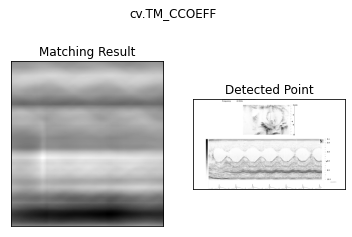

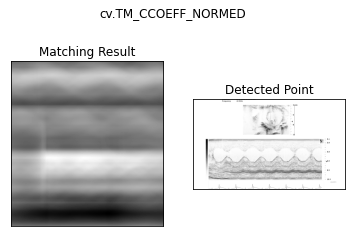

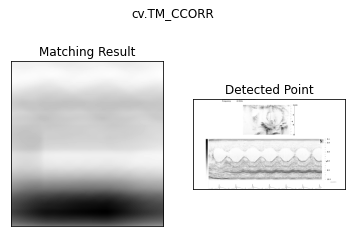

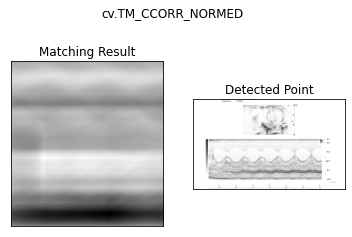

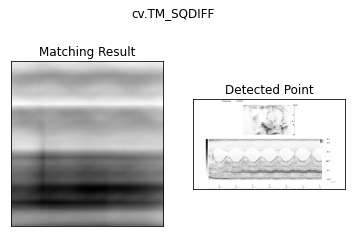

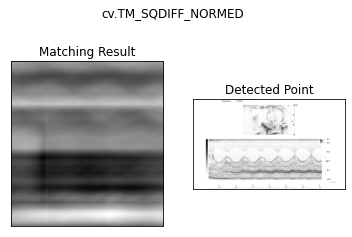

In [26]:
# Link: https://docs.opencv.org/4.x/d4/dc6/tutorial_py_template_matching.html

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('test_image.jpg',0)
img = 255-img
img2 = img.copy()
template = cv.imread('template_inv.jpg',0)
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img,top_left, bottom_right, 255, 2)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

### Just inverting the image and trying to measure something

In [3]:
img = cv2.imread("small_test_image.png", 0)
#img = 255-img
implot = plt.imshow(img, cmap="gray")

NameError: name 'plt' is not defined

In [53]:
# DOES NOT WORK 
# because we need to find the longest stretch of low values (black cells)

# Go through columns in image

print(len(img[0]))

# Go through every column

xy_caves = []

for i in range(len(img[0])):
    col = img[:,i]
    
    # Go through each pixel in column
    cave = False
    start, end = None, None
    for j in range(len(col)):
        if col[j] <= 4:
            if cave == False:
                start = [i,j]  #xy coordinates for start of vertical line in cave
                cave = True
        else:
            if cave == True:
                end = [i,j]  #xy coordinates for end of vertical line in cave
                cave == False
                break
    xy_caves.append([start,end])
            


            

    


1424


In [54]:
# Looking at one column 

print(xy_caves[350:360])

[[[350, 115], [350, 155]], [[351, 57], [351, 58]], [[352, 57], [352, 58]], [[353, 57], [353, 58]], [[354, 57], [354, 58]], [[355, 57], [355, 58]], [[356, 57], [356, 58]], [[357, 57], [357, 59]], [[358, 57], [358, 58]], [[359, 56], [359, 58]]]


In [52]:
print(img[:,350])

[  9  22  35  53  76  98 121 113 100  86  74  62  50  38  35  38  42  45
  51  57  62  69  74  80  86  79  65  50  35  29  23  18  15  15  14  15
  14  14  14  14  15  15  15  14  10   7   5   5   8   8  10  11  13  15
  13  10   8   6   6   7   7   8   9  10  13  11  10   9   6   6   7   7
   8   8   8   8   7   8   9   8   9   8   9   9   9  10  10   9   9   8
   7   8   9   9   9   8   8   7   9  12  16  18  16  13  11  10  10   9
   8   7   8   8   7   5   5   4   4   4   4   4   3   3   3   3   3   3
   2   1   3   2   1   2   2   2   3   3   3   2   3   3   2   2   3   3
   4   3   3   3   3   4   3   3   4   4   4   5   5   5   4   4   5   4
   4   5   5   4   5   4   5   4   5   5   5   5   6   6   6   5   5   5
   5   6   6   6   6   6   6   6   6   7   6   6   6   7   7   8   7   7
   8   7   7   8   8   8   8   8   8   9  10   9   9   9   9   9  10   9
   9   9  10  10  10  10  10   9  10   9   8   7   6   5   5   4   4   4
   5   6   6   7   8   9   9   9  10   9  10  11  1

In [32]:
# Link: https://www.geeksforgeeks.org/longest-sequence-positive-integers-array/
# Python code to find longest running
# sequence of positive integers.
 
 
def getLongestSeq(a, n):
    maxIdx = 0
    maxLen = 0
    currLen = 0
    currIdx = 0
    for k in range(n):
        if a[k] < 15:
            currLen += 1
 
            # New sequence, store
            # beginning index.
            if currLen == 1:
                currIdx = k
        else:
            if currLen > maxLen:
                maxLen = currLen
                maxIdx = currIdx
            currLen = 0
 
    if currLen > maxLen:
        maxLen = currLen
        maxIdx = currIdx
 
    if maxLen > 0:
        return maxIdx, maxLen #print('Index : ', maxIdx, ',Length : ', maxLen,)
    else:
        return 0,0 #print("No positive sequence detected.")


start_x = []
end_y = []

for i in range(len(img[0])):
    col = img[:,i]
    n_ = len(col)
    
    start,stretch = getLongestSeq(col, n_)
    
    start_x.append(start)
    end_y.append(start+stretch)




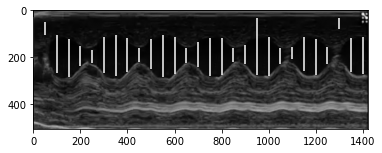

In [33]:
plt.imshow(img, cmap="gray")
for i in range(0,len(start_x),50):
    plt.vlines(i, start_x[i], end_y[i], colors="white")